**MONTE CARLO SIMULATIONS VIA PYTHON**

This Python Notebook contains an example that demonstrates the application of MCerp <https://pythonhosted.org/mcerp/> 
a library that supports Monte Carlo Simulations

This iPYNB is accompanied by a Medium Article available at https://zhijingeu.medium.com/building-a-probabilistic-risk-estimate-using-monte-carlo-simulations-with-python-mcerp-7d57e63112fa#f7fe
    

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mcerp import correlate, correlation_matrix, plotcorr
from mcerp import Beta, Uniform, PERT, Binomial
from mcerp import uv, stats, npts

from scipy import stats as stats
from scipy.stats import rv_histogram #rv_continuous, beta, genextreme,
# import scipy.optimize as opt

# import warnings
# warnings.filterwarnings("ignore")

np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:.3f}'.format


**PART 0 Basic Demo Of How MCerp Works**

In [2]:
npts=10000 #No of simulation runs 

x=PERT(1, 4, 10,4) 
x.describe()  
rx=x._mcpts # shows an array of all the individual simulation results
rx

MCERP Uncertain Value:
 > Mean...................  4.500001947707012
 > Variance...............  2.7500192326799433
 > Skewness Coefficient...  0.3015510435539349
 > Kurtosis Coefficient...  2.454672147715415



array([4.197, 3.422, 2.668, ..., 6.78 , 2.555, 3.961])

In [3]:
# helper function: plot histogram
def plot_hist(data, title):
    hist = np.histogram(data, bins=100)
    histdist = rv_histogram(hist)

    X = np.linspace(data.min(), data.max(), 100)
    plt.title(title)
    plt.hist(data, density=True, bins=100)
    plt.plot(X, histdist.pdf(X))
    plt.show()

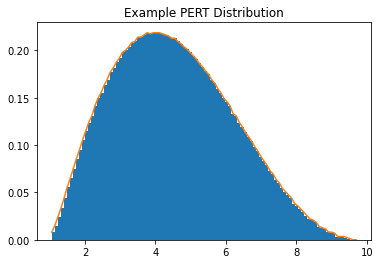

In [4]:
rx=x._mcpts
plot_hist(rx,"Example PERT Distribution")

**PART 1 Setting The Input Variables (Uncertainty Ranges and Discrete Risks) and Output Variables (Totals)**

In [5]:
#InputVariables

PlaneFare= PERT(5000,7000,12000) #BetaPert 
AccommodationCosts = PERT(2000,2500,4000) #BetaPert 
Meals=PERT(500,600,900)   #BetaPert 
MiscShoppingExpenses=1000 #Has No Range as It is UnRisked
HolidayActivityTours=Uniform(1500,4000) #Uniform
ClothingTravelGear=PERT(300,400,500) #BetaPert 

MedicalEmergencyRiskLikehood=Binomial(1, 0.1)
MedicalEmergencyRiskImpact=Uniform(1000,5000)

TheftRiskLikelihood=Binomial(1, 0.1)
TheftRiskImpact=PERT(500,750,2000) #BetaPert 


In [6]:
#OutputVariables
RiskedRanges = PlaneFare+AccommodationCosts+Meals+MiscShoppingExpenses+HolidayActivityTours+ClothingTravelGear
DiscreteRisks=MedicalEmergencyRiskLikehood*MedicalEmergencyRiskImpact+TheftRiskLikelihood*TheftRiskImpact
TotalHolidayCosts=RiskedRanges+DiscreteRisks

In [7]:
#Budget denominated in Fantasy Bucks 
TotalHolidayCosts.describe()

MCERP Uncertain Value:
 > Mean...................  15346.549196024704
 > Variance...............  3373969.3188937395
 > Skewness Coefficient...  0.6774684273199744
 > Kurtosis Coefficient...  3.775797914535057



**PART 2 Generating & Visualizing The Simulation Results**

In [8]:
# collect the results in array variables


rPlaneFare = PlaneFare._mcpts
rAccommodationCosts = AccommodationCosts._mcpts
rMeals = Meals._mcpts
rHolidayActivityTours = HolidayActivityTours._mcpts
rClothingTravelGear = ClothingTravelGear._mcpts
rMedicalEmergencyRiskLikehood = MedicalEmergencyRiskLikehood._mcpts
rMedicalEmergencyRiskImpact=MedicalEmergencyRiskImpact._mcpts
rTheftRiskLikelihood=TheftRiskLikelihood._mcpts
rTheftRiskImpact=TheftRiskImpact._mcpts
rRiskedRanges=RiskedRanges._mcpts
rDiscreteRisks=DiscreteRisks._mcpts
rTotalHolidayCosts=TotalHolidayCosts._mcpts

# combine the arrays in a 2-dimensional array
rand1 = np.vstack((rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                   rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,
                  rTheftRiskLikelihood,rTheftRiskImpact,rRiskedRanges,rDiscreteRisks,rTotalHolidayCosts))

VarNames=["Input_PlaneFare", "Input_AccomCosts", "Input_Meals", "Input_HolidayActivityTours", "Input_ClothingTravelGear", 
          "Input_MedEmergencyChance","Input_MedEmergencyCost","Input_TheftRiskChance","Input_TheftRiskCost",
         "Output_RiskedRanges","Output_DiscreteRisks","Output_TotalHolidayCosts"]

# copy the array to a dataframe for a more transparent layout
df1 = pd.DataFrame(data=rand1).T 
df1.columns=VarNames
df1

,Input_PlaneFare,Input_AccomCosts,Input_Meals,Input_HolidayActivityTours,Input_ClothingTravelGear,Input_MedEmergencyChance,Input_MedEmergencyCost,Input_TheftRiskChance,Input_TheftRiskCost,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0,6478.380,2567.648,593.899,3801.874,386.939,0.000,4110.398,0.000,709.764,14828.740,0.000,14828.740
1,8744.755,2901.583,613.864,1606.657,359.085,0.000,3682.168,0.000,922.029,15225.944,0.000,15225.944
2,7578.864,2767.126,562.530,3789.561,379.845,0.000,1458.296,0.000,1139.373,16077.926,0.000,16077.926
3,8582.583,2839.686,582.103,2235.502,449.944,0.000,2720.027,0.000,699.745,15689.818,0.000,15689.818
4,6793.935,2230.152,643.665,3264.168,429.919,0.000,2034.835,1.000,733.362,14361.839,733.362,15095.201
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8076.417,2391.724,662.891,2593.336,357.136,0.000,2150.780,0.000,1089.383,15081.503,0.000,15081.503
9996,8317.054,2433.082,545.536,3447.001,455.003,0.000,3458.361,0.000,564.494,16197.677,0.000,16197.677
9997,8274.363,2467.672,553.497,2469.298,325.836,0.000,4348.711,0.000,881.535,15090.666,0.000,15090.666
9998,9151.036,2809.888,595.036,2744.015,434.775,0.000,4211.639,0.000,1062.130,16734.749,0.000,16734.749


In [9]:
df1.quantile([.1, .25, .5, .75, .9], axis = 0)

,Input_PlaneFare,Input_AccomCosts,Input_Meals,Input_HolidayActivityTours,Input_ClothingTravelGear,Input_MedEmergencyChance,Input_MedEmergencyCost,Input_TheftRiskChance,Input_TheftRiskCost,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0.100,5904.583,2224.525,544.897,1750.131,349.338,0.000,1400.171,0.000,614.052,13009.037,0.000,13149.285
0.250,6512.526,2387.581,577.506,2125.071,371.891,0.000,2000.146,0.000,715.783,13850.886,0.000,14052.463
0.500,7382.563,2627.635,625.530,2749.915,400.004,0.000,3000.099,0.000,877.943,14878.562,0.000,15181.387
0.750,8374.897,2908.275,681.665,3374.974,428.115,0.000,3999.869,0.000,1080.486,15972.252,0.000,16421.823
0.900,9272.620,3167.728,733.548,3749.965,450.667,0.100,4599.959,0.100,1277.826,16978.410,1324.173,17744.255


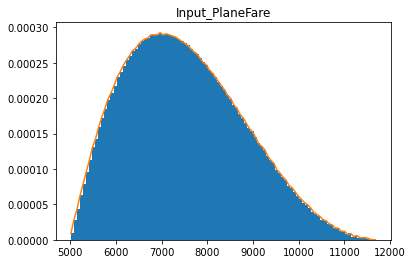

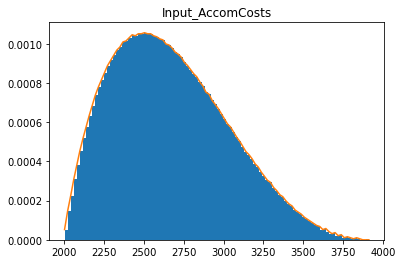

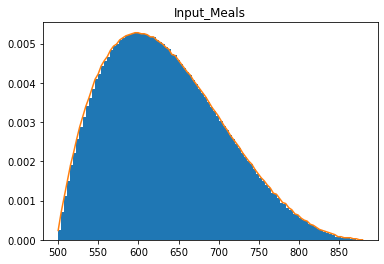

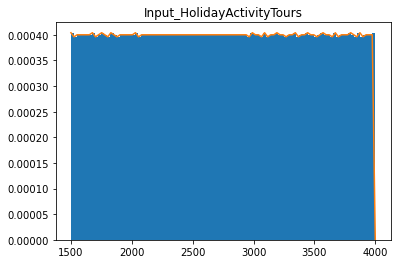

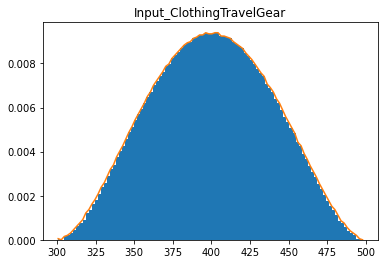

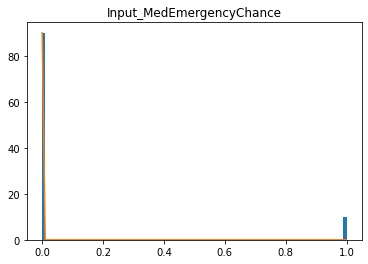

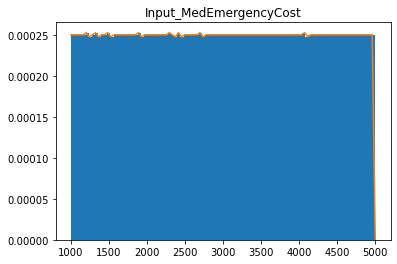

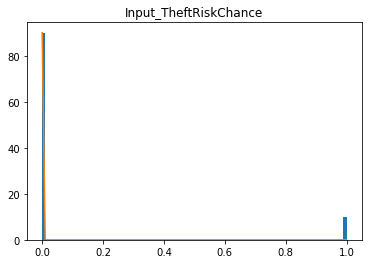

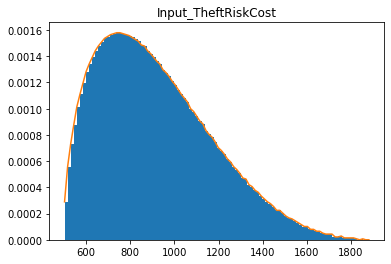

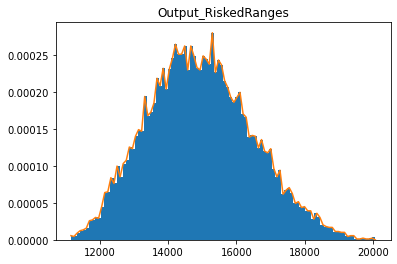

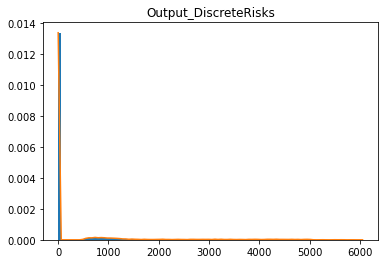

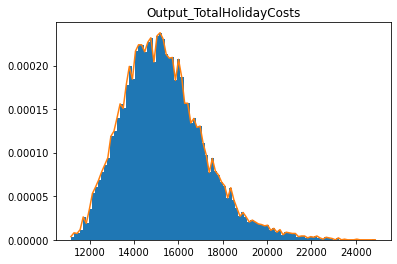

In [10]:
VarSimResults=[rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,rTheftRiskLikelihood,
               rTheftRiskImpact,rRiskedRanges,rDiscreteRisks,rTotalHolidayCosts]



for n in range(0,len(VarSimResults)):
    plot_hist(VarSimResults[n],VarNames[n])


**PART 3 Applying Correlation Factors Between Uncertainty Range Input Variables**

In [11]:
# get the correlation matrix BEFORE applying correlation
BeforeCorrApplied = correlation_matrix([AccommodationCosts, Meals, HolidayActivityTours])
BeforeCorrApplied

array([[ 1.   , -0.003,  0.005],
       [-0.003,  1.   ,  0.008],
       [ 0.005,  0.008,  1.   ]])

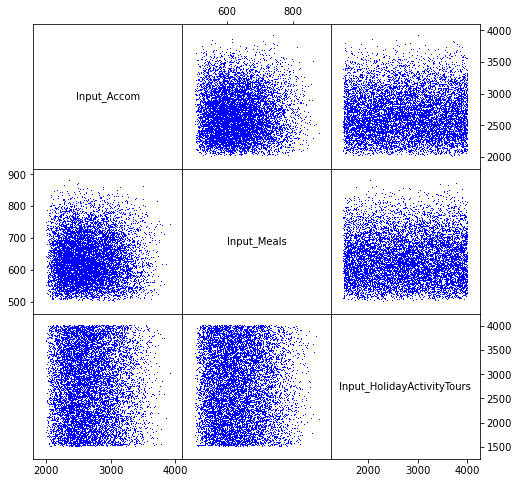

In [12]:
# plot correlations BEFORE applying correlation
corrplot0 = plotcorr([AccommodationCosts, Meals, HolidayActivityTours], labels=["Input_Accom", 
                                                                                "Input_Meals", "Input_HolidayActivityTours"])

In [13]:
applied_correlation=np.array([[1.00, 0.85,  0.85],
                               [0.85,  1.00, 0.85],
                               [0.85,  0.85, 1.0]])


In [14]:
# impose the targeted correlation matrix on the 3 input variables
correlate([AccommodationCosts, Meals, HolidayActivityTours], applied_correlation)

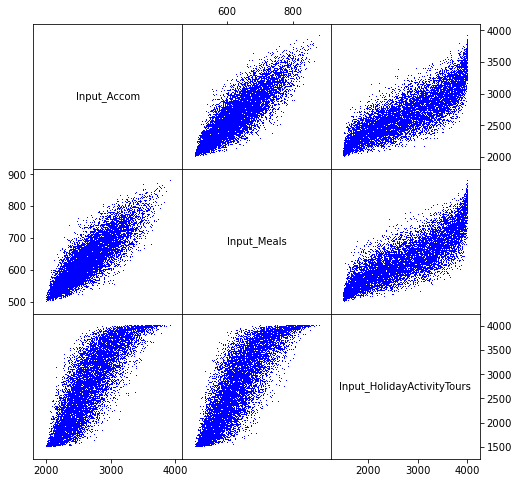

In [15]:
# plot the new correlation matrix of the input variables
corrplot2 = plotcorr([AccommodationCosts, Meals, HolidayActivityTours], 
                     labels=["Input_Accom","Input_Meals", "Input_HolidayActivityTours"])

In [16]:
# check the new correlation matrix for the 3 input variables
calculatedCorr = correlation_matrix([AccommodationCosts, Meals, HolidayActivityTours])
calculatedCorr

array([[1.   , 0.846, 0.833],
       [0.846, 1.   , 0.83 ],
       [0.833, 0.83 , 1.   ]])

In [17]:
#OutputVariables - Rerun with Corr Variables
RiskedRanges = PlaneFare+AccommodationCosts+Meals+MiscShoppingExpenses+HolidayActivityTours+ClothingTravelGear
DiscreteRisks=MedicalEmergencyRiskLikehood*MedicalEmergencyRiskImpact+TheftRiskLikelihood*TheftRiskImpact
TotalHolidayCosts=RiskedRanges+DiscreteRisks

In [18]:
#Budget denominated in Fantasy Bucks With Correlated Inputs 
TotalHolidayCosts.describe()

MCERP Uncertain Value:
 > Mean...................  15346.549196024704
 > Variance...............  3958977.2620799714
 > Skewness Coefficient...  0.5687811845194505
 > Kurtosis Coefficient...  3.471627082310302



In [21]:
# run the simulation model, 
# and collect the results in array variables


rPlaneFare = PlaneFare._mcpts
rAccommodationCosts = AccommodationCosts._mcpts
rMeals = Meals._mcpts
rHolidayActivityTours = HolidayActivityTours._mcpts
rClothingTravelGear = ClothingTravelGear._mcpts
rMedicalEmergencyRiskLikehood = MedicalEmergencyRiskLikehood._mcpts
rMedicalEmergencyRiskImpact=MedicalEmergencyRiskImpact._mcpts
rTheftRiskLikelihood=TheftRiskLikelihood._mcpts
rTheftRiskImpact=TheftRiskImpact._mcpts
rRiskedRanges=RiskedRanges._mcpts
rDiscreteRisks=DiscreteRisks._mcpts
rTotalHolidayCosts=TotalHolidayCosts._mcpts

# combine the arrays in a 2-dimensional array
rand1 = np.vstack((rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                   rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,
                  rTheftRiskLikelihood,rTheftRiskImpact,rRiskedRanges,rDiscreteRisks,rTotalHolidayCosts))

VarNames=["Input_PlaneFare", "Input_AccomCosts", "Input_Meals", "Input_HolidayActivityTours", "Input_ClothingTravelGear", 
          "Input_MedEmergencyChance","Input_MedEmergencyCost","Input_TheftRiskChance","Input_TheftRiskCost",
         "Output_RiskedRanges","Output_DiscreteRisks","Output_TotalHolidayCosts"]

# copy the array to a dataframe for a more transparent layout
df_postCorr = pd.DataFrame(data=rand1).T 
df_postCorr.columns=VarNames
df_postCorr

,Input_PlaneFare,Input_AccomCosts,Input_Meals,Input_HolidayActivityTours,Input_ClothingTravelGear,Input_MedEmergencyChance,Input_MedEmergencyCost,Input_TheftRiskChance,Input_TheftRiskCost,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0,6478.380,2567.648,598.125,3160.594,386.939,0.000,4110.398,0.000,709.764,14191.686,0.000,14191.686
1,8744.755,2901.583,666.135,2475.940,359.085,0.000,3682.168,0.000,922.029,16147.498,0.000,16147.498
2,7578.864,2767.126,610.138,3405.645,379.845,0.000,1458.296,0.000,1139.373,15741.618,0.000,15741.618
3,8582.583,2839.686,636.473,2805.186,449.944,0.000,2720.027,0.000,699.745,16313.873,0.000,16313.873
4,6793.935,2230.152,561.351,2052.572,429.919,0.000,2034.835,1.000,733.362,13067.929,733.362,13801.291
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8076.417,2391.724,600.331,2247.427,357.136,0.000,2150.780,0.000,1089.383,14673.035,0.000,14673.035
9996,8317.054,2433.082,552.568,2363.605,455.003,0.000,3458.361,0.000,564.494,15121.312,0.000,15121.312
9997,8274.363,2467.672,561.708,2050.545,325.836,0.000,4348.711,0.000,881.535,14680.125,0.000,14680.125
9998,9151.036,2809.888,640.105,3021.717,434.775,0.000,4211.639,0.000,1062.130,17057.521,0.000,17057.521


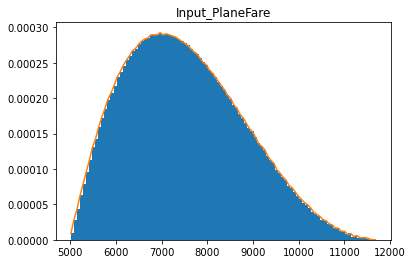

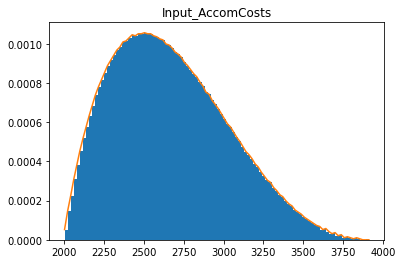

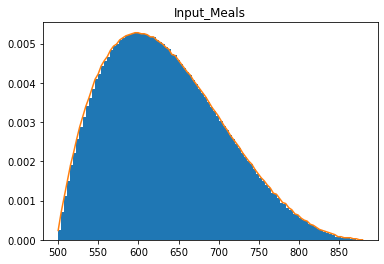

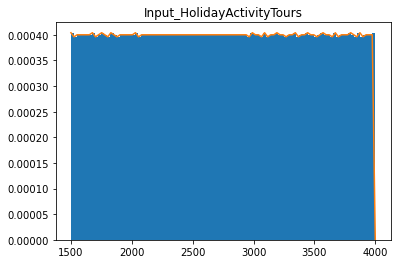

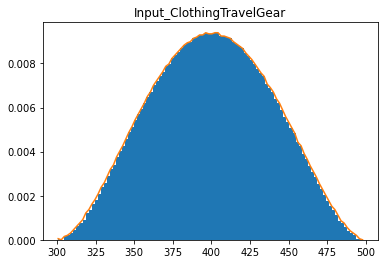

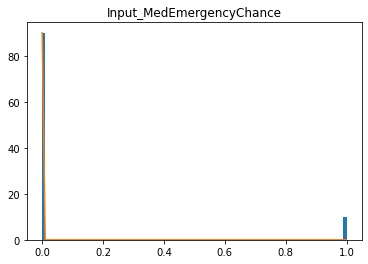

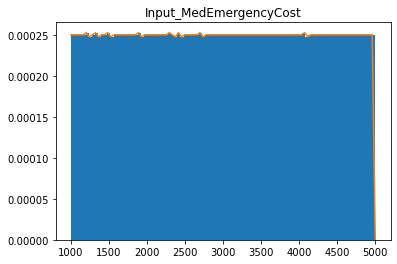

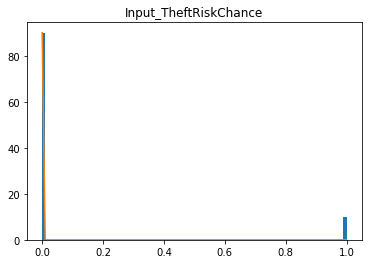

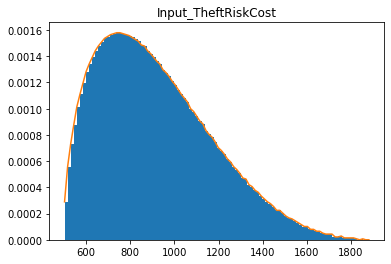

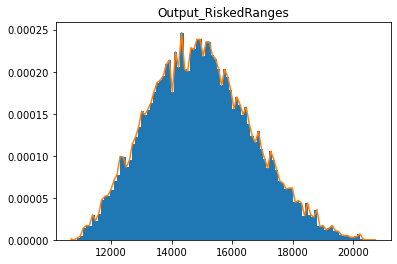

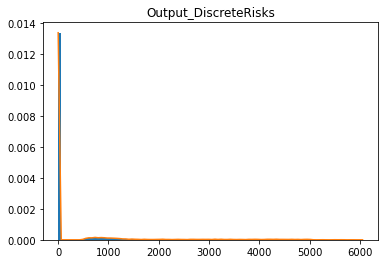

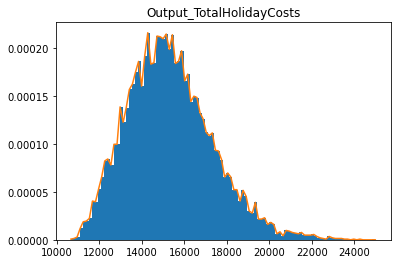

In [22]:
# helper function: plot histogram
VarSimResults=[rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,rTheftRiskLikelihood,
               rTheftRiskImpact,rRiskedRanges,rDiscreteRisks,rTotalHolidayCosts]



for n in range(0,len(VarSimResults)):
    plot_hist(VarSimResults[n],VarNames[n])

In [23]:
df_postCorr[["Output_RiskedRanges","Output_DiscreteRisks","Output_TotalHolidayCosts"]].quantile([.1, .25, .5, .75, .9], axis = 0)

,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0.100,12780.423,0.000,12917.892
0.250,13720.396,0.000,13911.365
0.500,14884.911,0.000,15181.561
0.750,16089.086,0.000,16566.000
0.900,17255.296,1324.173,17967.747


In [24]:
#Comparing against the uncorrelated results
df1[["Output_RiskedRanges","Output_DiscreteRisks","Output_TotalHolidayCosts"]].quantile([.1, .25, .5, .75, .9], axis = 0)

,Output_RiskedRanges,Output_DiscreteRisks,Output_TotalHolidayCosts
0.100,13009.037,0.000,13149.285
0.250,13850.886,0.000,14052.463
0.500,14878.562,0.000,15181.387
0.750,15972.252,0.000,16421.823
0.900,16978.410,1324.173,17744.255


**PART 4 Setting A Meta Variable By Introducing FOREX Uncertainty**

In [25]:
FOREXVariability=PERT(3.75,4.00,4.50) #BetaPert

#OutputVariables - Rerun with Corr Variables AND FOREX
RiskedRanges = PlaneFare+AccommodationCosts+Meals+MiscShoppingExpenses+HolidayActivityTours+ClothingTravelGear
DiscreteRisks=MedicalEmergencyRiskLikehood*MedicalEmergencyRiskImpact+TheftRiskLikelihood*TheftRiskImpact
TotalHolidayCosts=RiskedRanges+DiscreteRisks
TotalHolidayCostsInUSD=TotalHolidayCosts/FOREXVariability

In [26]:
# run the simulation model, 
# and collect the results in array variables


rPlaneFare = PlaneFare._mcpts
rAccommodationCosts = AccommodationCosts._mcpts
rMeals = Meals._mcpts
rHolidayActivityTours = HolidayActivityTours._mcpts
rClothingTravelGear = ClothingTravelGear._mcpts
rMedicalEmergencyRiskLikehood = MedicalEmergencyRiskLikehood._mcpts
rMedicalEmergencyRiskImpact=MedicalEmergencyRiskImpact._mcpts
rTheftRiskLikelihood=TheftRiskLikelihood._mcpts
rTheftRiskImpact=TheftRiskImpact._mcpts
rRiskedRanges=RiskedRanges._mcpts
rDiscreteRisks=DiscreteRisks._mcpts
rTotalHolidayCosts=TotalHolidayCosts._mcpts
rFOREXVariability=FOREXVariability._mcpts
rTotalHolidayCostsInUSD=TotalHolidayCostsInUSD._mcpts

# combine the arrays in a 2-dimensional array
rand1 = np.vstack((rPlaneFare,rAccommodationCosts,rMeals,rHolidayActivityTours,rClothingTravelGear,
                   rMedicalEmergencyRiskLikehood,rMedicalEmergencyRiskImpact,
                  rTheftRiskLikelihood,rTheftRiskImpact,rRiskedRanges,
                   rDiscreteRisks,rFOREXVariability,rTotalHolidayCostsInUSD))

VarNames=["Input_PlaneFare", "Input_AccomCosts", "Input_Meals", "Input_HolidayActivityTours", "Input_ClothingTravelGear", 
          "Input_MedEmergencyChance","Input_MedEmergencyCost","Input_TheftRiskChance","Input_TheftRiskCost",
         "Output_RiskedRanges","Output_DiscreteRisks","Output_FOREXVariability","Output_TotalHolidayCostsInUSD"]

# copy the array to a dataframe for a more transparent layout
df_postCorrPlusFOREX= pd.DataFrame(data=rand1).T 
df_postCorrPlusFOREX.columns=VarNames
df_postCorrPlusFOREX

,Input_PlaneFare,Input_AccomCosts,Input_Meals,Input_HolidayActivityTours,Input_ClothingTravelGear,Input_MedEmergencyChance,Input_MedEmergencyCost,Input_TheftRiskChance,Input_TheftRiskCost,Output_RiskedRanges,Output_DiscreteRisks,Output_FOREXVariability,Output_TotalHolidayCostsInUSD
0,6478.380,2567.648,598.125,3160.594,386.939,0.000,4110.398,0.000,709.764,14191.686,0.000,3.913,3626.987
1,8744.755,2901.583,666.135,2475.940,359.085,0.000,3682.168,0.000,922.029,16147.498,0.000,3.955,4083.278
2,7578.864,2767.126,610.138,3405.645,379.845,0.000,1458.296,0.000,1139.373,15741.618,0.000,4.169,3775.820
3,8582.583,2839.686,636.473,2805.186,449.944,0.000,2720.027,0.000,699.745,16313.873,0.000,3.868,4217.702
4,6793.935,2230.152,561.351,2052.572,429.919,0.000,2034.835,1.000,733.362,13067.929,733.362,4.058,3400.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8076.417,2391.724,600.331,2247.427,357.136,0.000,2150.780,0.000,1089.383,14673.035,0.000,4.303,3409.987
9996,8317.054,2433.082,552.568,2363.605,455.003,0.000,3458.361,0.000,564.494,15121.312,0.000,4.059,3725.174
9997,8274.363,2467.672,561.708,2050.545,325.836,0.000,4348.711,0.000,881.535,14680.125,0.000,3.893,3771.116
9998,9151.036,2809.888,640.105,3021.717,434.775,0.000,4211.639,0.000,1062.130,17057.521,0.000,3.950,4318.197


In [27]:
#Budget denominated in Fantasy Bucks With Correlated Inputs AND Forex Variability
TotalHolidayCostsInUSD.describe()

MCERP Uncertain Value:
 > Mean...................  3801.552548241204
 > Variance...............  260350.55510441636
 > Skewness Coefficient...  0.5620976482313449
 > Kurtosis Coefficient...  3.4814516133147686



In [28]:
df_postCorrPlusFOREX[["Output_TotalHolidayCostsInUSD"]].quantile([.1, .25, .5, .75, .9], axis = 0)

,Output_TotalHolidayCostsInUSD
0.100,3176.111
0.250,3432.759
0.500,3764.680
0.750,4112.395
0.900,4470.118


In [29]:
#Comparing against the previous results assuming a FIXED 4 Fantasy Bucks = 1 USD ratio (i.e no FOREX Variability)

df_compare=df_postCorr[["Output_TotalHolidayCosts"]].quantile([.1, .25, .5, .75, .9], axis = 0)*(1/4)
df_compare.columns=['Output_TotalHolidayCostsInUSD_Sans_FOREXVar']
df_compare

,Output_TotalHolidayCostsInUSD_Sans_FOREXVar
0.100,3229.473
0.250,3477.841
0.500,3795.390
0.750,4141.500
0.900,4491.937


**PART 5 Analyzing The Key Factors Driving The Outputs**

In [30]:
#Viewing the results by ranking the correlations between each random input variable 
#(i.e uncertain ranges or risk events likelihoods or impact ranges) and the outcome

# check the new correlation matrix for the 3 input variables
OutputVsInputCorr = correlation_matrix([TotalHolidayCostsInUSD,PlaneFare,AccommodationCosts,
                                        Meals,HolidayActivityTours,ClothingTravelGear,
                                        MedicalEmergencyRiskLikehood, MedicalEmergencyRiskImpact, 
                                        TheftRiskLikelihood,TheftRiskImpact,
                                        FOREXVariability])


In [31]:
df_Correlation=pd.DataFrame(data=OutputVsInputCorr)
df_Correlation.columns=["Output_TotalHolidayCosts","Input_PlaneFare", "Input_AccomCosts", "Input_Meals", 
                             "Input_HolidayActivityTours", "Input_ClothingTravelGear",
                        "Input_MedEmergencyChance","Input_MedEmergencyCost","Input_TheftRiskChance","Input_TheftRiskCost",
                        "FOREX Variability"]

df_Correlation.T[0][1:].sort_values(ascending=False)

Input_PlaneFare               0.633
Input_HolidayActivityTours    0.540
Input_AccomCosts              0.509
Input_Meals                   0.489
Input_MedEmergencyChance      0.448
Input_TheftRiskChance         0.137
Input_MedEmergencyCost        0.063
Input_ClothingTravelGear      0.028
Input_TheftRiskCost           0.011
FOREX Variability            -0.256
Name: 0, dtype: float64

<AxesSubplot:>

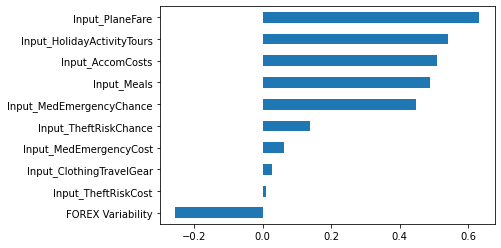

In [32]:
df_Correlation.T[0][1:].sort_values().plot.barh()